In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading data
train_data = pd.read_csv('/kaggle/input/osic-pulmonary-fibrosis-progression/train.csv')
test_data = pd.read_csv('/kaggle/input/osic-pulmonary-fibrosis-progression/test.csv')

In [4]:
train_data.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [5]:
test_data

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB


In [7]:
train_data.isna().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

In [8]:
train_data.columns

Index(['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus'], dtype='object')

In [9]:
train_data = train_data.drop(columns= ['Patient'], axis = 1)
train_data.head()

,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,-4,2315,58.253649,79,Male,Ex-smoker
1,5,2214,55.712129,79,Male,Ex-smoker
2,7,2061,51.862104,79,Male,Ex-smoker
3,9,2144,53.950679,79,Male,Ex-smoker
4,11,2069,52.063412,79,Male,Ex-smoker


In [10]:
# for getting unique values from data
for i in list(train_data.select_dtypes(include= np.object).columns):
    print(train_data[i].unique(), '\n')

['Male' 'Female'] 

['Ex-smoker' 'Never smoked' 'Currently smokes'] 



### Data distributions

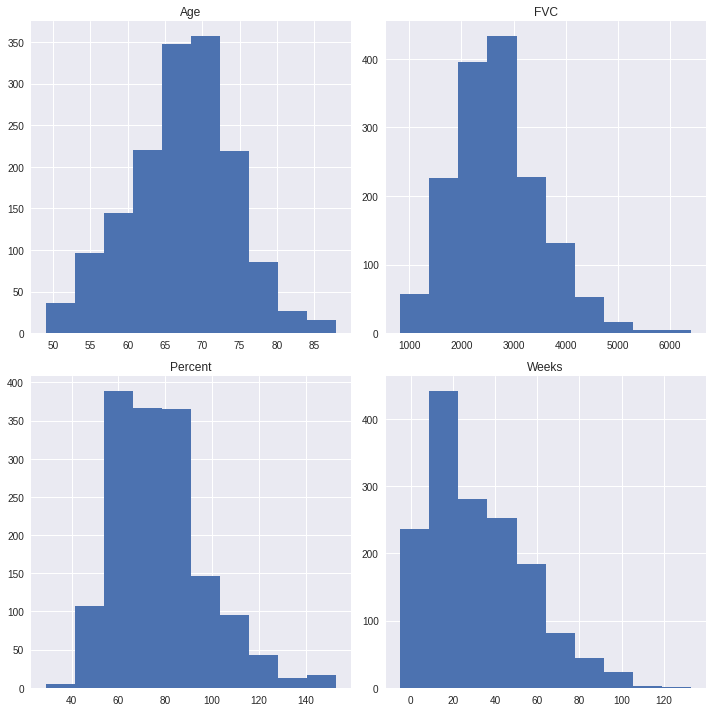

In [11]:
plt.style.use('seaborn')
train_data.select_dtypes(include= [np.int64, np.float64]).hist(figsize= (10,10))
plt.tight_layout()
plt.show()

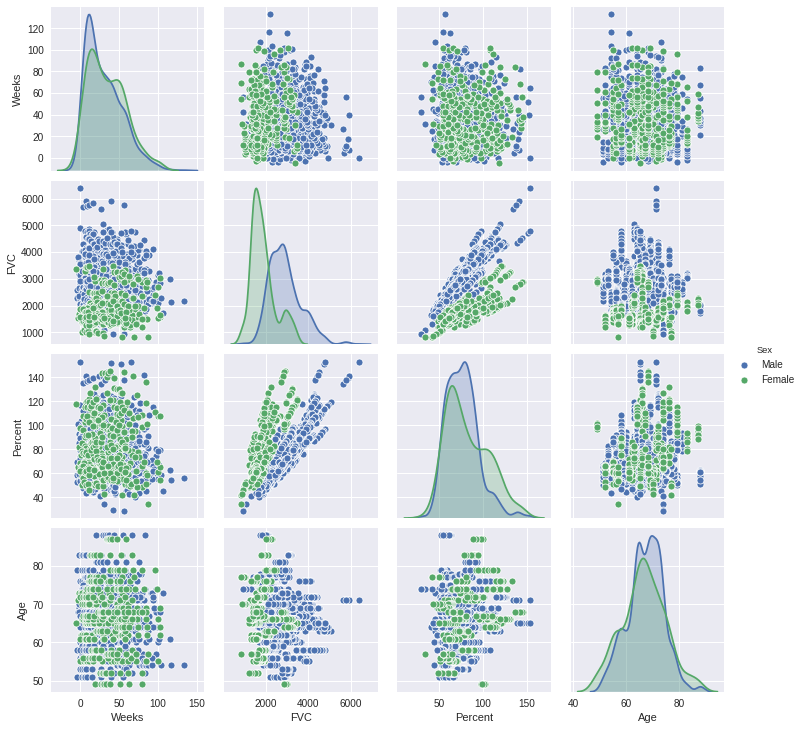

In [12]:
sns.pairplot(train_data[list(train_data.columns)[:-1]], hue= 'Sex')
plt.show()

In [13]:
train_cols = list(train_data.columns)
train_cols.remove('Sex')


In [14]:
train_cols

['Weeks', 'FVC', 'Percent', 'Age', 'SmokingStatus']

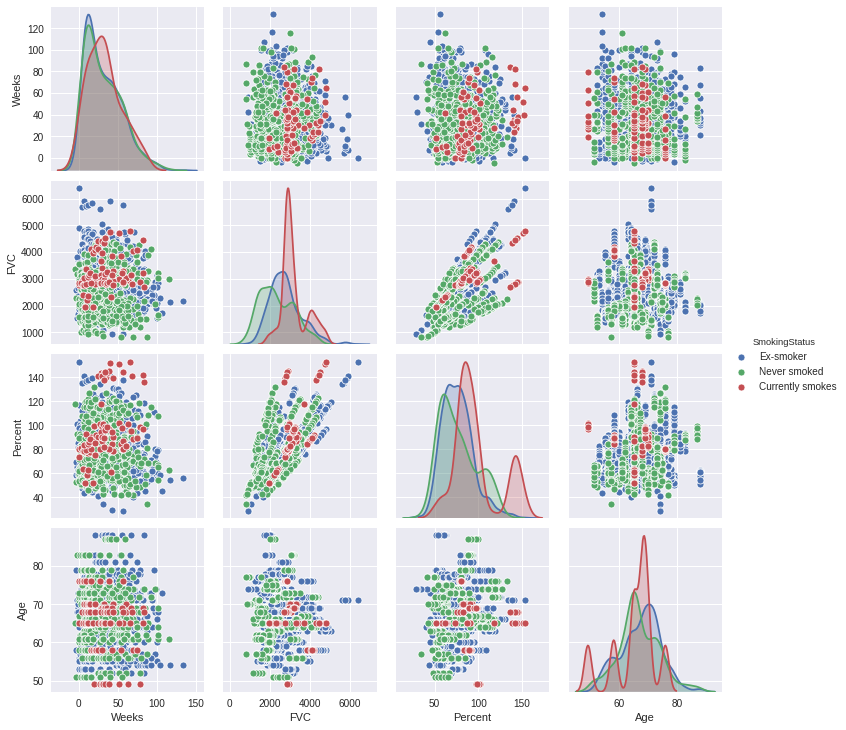

In [15]:
sns.pairplot(train_data[train_cols], hue= 'SmokingStatus')
plt.show()

In [16]:
# get dummies for training data 
train_data_final = pd.get_dummies(train_data, columns=['Sex', 'SmokingStatus'], drop_first= True)
train_data_final.head()

,Weeks,FVC,Percent,Age,Sex_Male,SmokingStatus_Ex-smoker,SmokingStatus_Never smoked
0,-4,2315,58.253649,79,1,1,0
1,5,2214,55.712129,79,1,1,0
2,7,2061,51.862104,79,1,1,0
3,9,2144,53.950679,79,1,1,0
4,11,2069,52.063412,79,1,1,0


In [17]:
X_data = train_data_final.drop(columns= 'FVC', axis = 1)
y_data = train_data_final['FVC']

In [18]:
X = X_data.iloc[:, ].values
y = y_data.iloc[:, ].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [20]:
X_train[:, :3]

array([[ 19.        ,  77.59672891,  77.        ],
       [ 29.        ,  56.34505703,  70.        ],
       [ 11.        ,  90.7586914 ,  69.        ],
       ...,
       [ 13.        ,  63.91555597,  69.        ],
       [ 70.        ,  39.98935553,  64.        ],
       [ 52.        , 151.1954993 ,  65.        ]])

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :3] = sc.fit_transform(X_train[:, :3])
X_test[:, :3] = sc.transform(X_test[:, :3])

In [22]:
X_train

array([[-0.54549083,  0.02520904,  1.37602307,  1.        ,  1.        ,
         0.        ],
       [-0.1159077 , -1.06877154,  0.40020556,  1.        ,  1.        ,
         0.        ],
       [-0.88915733,  0.7027525 ,  0.26080306,  1.        ,  1.        ,
         0.        ],
       ...,
       [-0.8032407 , -0.67906203,  0.26080306,  1.        ,  1.        ,
         0.        ],
       [ 1.64538312, -1.91072036, -0.43620944,  1.        ,  1.        ,
         0.        ],
       [ 0.87213349,  3.81388158, -0.29680694,  1.        ,  0.        ,
         0.        ]])

In [23]:
import xgboost as xgb
xgb_model = xgb.XGBRFRegressor()
xgb_model.fit(X_train, y_train)
print('training score: {}'.format(xgb_model.score(X_train, y_train)))
print('testing score: {}'.format(xgb_model.score(X_test, y_test)))

training score: 0.935068997130142
testing score: 0.9200399896495661


### Working with images

In [24]:
import pydicom

In [25]:
# check how many images in out train and test folders
import os
print('training image folders : {}'.format(len(list(os.listdir('/kaggle/input/osic-pulmonary-fibrosis-progression/train')))))
print('training image folders : {}'.format(len(list(os.listdir('/kaggle/input/osic-pulmonary-fibrosis-progression/test')))))

training image folders : 176
training image folders : 5


Patient ID : ID00012637202177665765362 , images found: 49


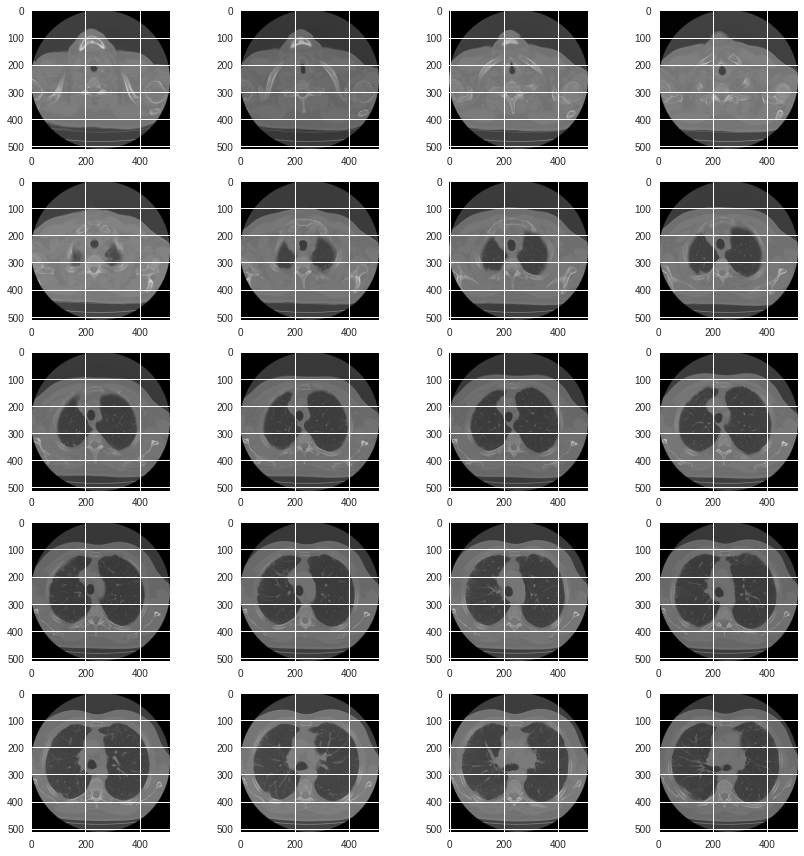

In [26]:
# to check individual patient DICOMs
img_dir = '../input/osic-pulmonary-fibrosis-progression/train/ID00012637202177665765362'
print('Patient ID : ID00012637202177665765362 , images found: {}'.format(len(list(os.listdir(img_dir)))))

# visualizations of DICOM

fig = plt.figure(figsize=(12, 12))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    filename = img_dir + "/" + str(i) + ".dcm"
    ds = pydicom.dcmread(filename)
    fig.add_subplot(rows, columns, i)
    plt.imshow(ds.pixel_array, cmap='gray')
plt.tight_layout()    
plt.show()

Patient ID : ID00012637202177665765362 , images found: 49


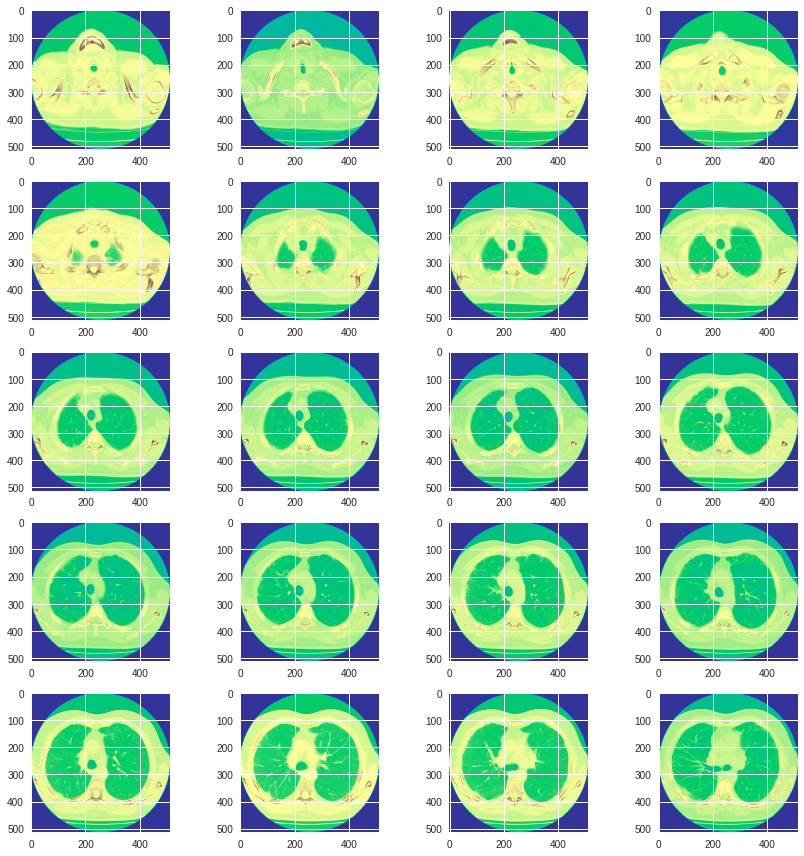

In [27]:
# to check individual patient DICOMs
img_dir = '../input/osic-pulmonary-fibrosis-progression/train/ID00012637202177665765362'
print('Patient ID : ID00012637202177665765362 , images found: {}'.format(len(list(os.listdir(img_dir)))))

# visualizations of DICOM
# official documentation for cmap colors : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html


fig = plt.figure(figsize=(12, 12))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    filename = img_dir + "/" + str(i) + ".dcm"
    ds = pydicom.dcmread(filename)
    fig.add_subplot(rows, columns, i)
    plt.imshow(ds.pixel_array, cmap='terrain')
plt.tight_layout()    
plt.show()

Filename.........: ../input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/1.dcm
Patient's name......: ID00123637202217151272140, 
(0020, 0037) Image Orientation (Patient)         DS: [1, 0, 0, 0, 1, 0]
(0020, 0032) Image Position (Patient)            DS: [-135.598389, -20.5262623, -291.5]
(0010, 0020) Patient ID                          LO: 'ID00123637202217151272140'
(0010, 0010) Patient's Name                      PN: 'ID00123637202217151272140'
(0010, 0040) Patient's Sex                       CS: ''
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.61328125, 0.61328125]


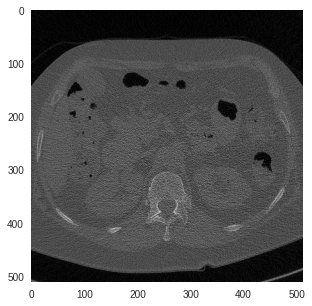

Filename.........: ../input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/2.dcm
Patient's name......: ID00123637202217151272140, 
(0020, 0037) Image Orientation (Patient)         DS: [1, 0, 0, 0, 1, 0]
(0020, 0032) Image Position (Patient)            DS: [-135.598389, -20.5262623, -290.5]
(0010, 0020) Patient ID                          LO: 'ID00123637202217151272140'
(0010, 0010) Patient's Name                      PN: 'ID00123637202217151272140'
(0010, 0040) Patient's Sex                       CS: ''
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.61328125, 0.61328125]


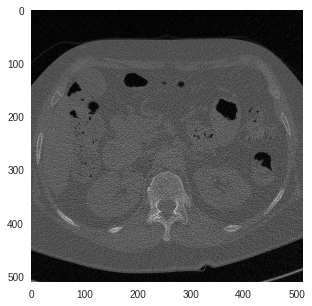

In [28]:
# credits : https://www.kaggle.com/piantic/osic-pulmonary-fibrosis-progression-basic-eda

def plot_pixel_array(dataset, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.grid(False)
    plt.imshow(dataset.pixel_array, cmap='gray') # cmap=plt.cm.bone)
    plt.show()
    
def show_dcm_info(dataset):
    print("Filename.........:", file_path)

    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name......:", display_name)
    
    print(dataset.data_element("ImageOrientationPatient"))
    print(dataset.data_element("ImagePositionPatient"))
    print(dataset.data_element("PatientID"))
    print(dataset.data_element("PatientName"))
    print(dataset.data_element("PatientSex"))
   
    
    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)    
            
#------------------

i = 1
num_to_plot = 2
for folder_name in os.listdir('../input/osic-pulmonary-fibrosis-progression/train/'):
        patient_path = os.path.join('../input/osic-pulmonary-fibrosis-progression/train/',folder_name)
        
        for i in range(1, num_to_plot+1):     
            file_path = os.path.join(patient_path, str(i) + '.dcm')

            dataset = pydicom.dcmread(file_path)
            show_dcm_info(dataset)
            plot_pixel_array(dataset)

        break
    

### Note: Still need to work....please suggest and leave a comment once you read my workbook

In [29]:
# checking each indiviual training images length
img_dir = '../input/osic-pulmonary-fibrosis-progression/train/'
print('training image folders : {}'.format(len(list(os.listdir('/kaggle/input/osic-pulmonary-fibrosis-progression/train')))))

for i in list(os.listdir(img_dir)):
    print('patient ID: {}, length is :{}'.format(i, len(list(os.listdir(img_dir + i)))))



training image folders : 176
patient ID: ID00123637202217151272140, length is :258
patient ID: ID00407637202308788732304, length is :54
patient ID: ID00023637202179104603099, length is :27
patient ID: ID00267637202270790561585, length is :63
patient ID: ID00224637202259281193413, length is :54
patient ID: ID00007637202177411956430, length is :30
patient ID: ID00233637202260580149633, length is :405
patient ID: ID00108637202209619669361, length is :512
patient ID: ID00125637202218590429387, length is :22
patient ID: ID00173637202238329754031, length is :602
patient ID: ID00170637202238079193844, length is :178
patient ID: ID00248637202266698862378, length is :16
patient ID: ID00273637202271319294586, length is :74
patient ID: ID00240637202264138860065, length is :33
patient ID: ID00052637202186188008618, length is :311
patient ID: ID00251637202267455595113, length is :28
patient ID: ID00133637202223847701934, length is :52
patient ID: ID00339637202287377736231, length is :56
patient ID: